\begin{exercise}
In this home quiz you must run all the models presented here for the following wine dataset.

\end{exercise}


In [1]:
import pandas as pd
import numpy as np

In [2]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine

# STEP 1 - Loading the wine data set
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
# STEP 2 - Defining the predictors and target variable
X = wine.data
y = wine.target

# STEP 3 - Splitting the data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,stratify=y,random_state=20052017)

# STEP 4 - Importing and fitting the model
from sklearn.ensemble import BaggingClassifier
# In Bagging classifier, base_estimator = None so the base estimator is set by default to a DecisionTreeClassifier
wine_BC = BaggingClassifier(n_estimators=100, max_features=3, random_state=0)
BC = wine_BC.fit(X_train,y_train)

# STEP 5 - Calculating the score of the model using the test data
BC.score(X_test,y_test)


0.9444444444444444

commentary : In Bagging classifier, base_estimator = None, so the base estimator is set by default to a DecisionTreeClassifier

# Part I - Classification and Regression Trees (CART)

In [5]:
# CLASSIFICATION
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)

# Instantiate dt
dt1 = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate dt, set 'criterion' to 'gini'
dt2 = DecisionTreeClassifier(criterion= 'gini', random_state=1)

# Instantiate dt, set 'entropy' as the information criterion
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Most of the time, the gini index and entropy lead to the same results.
# The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn

# Fit dt to the training set
dt1.fit(X_train,y_train)
dt2.fit(X_train,y_train)
dt3.fit(X_train,y_train)
# Predict test set labels
y_pred1 = dt1.predict(X_test)
y_pred2 = dt2.predict(X_test)
y_pred3 = dt3.predict(X_test)
# Evaluate test-set accuracy
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)
print("Decision Tree classifier")
print("Test set accuracy : {:.2f}".format(acc1))
print("Test set accuracy gini : {:.2f}".format(acc2))
print("Test set accuracy entropy: {:.2f}".format(acc3))

# REGRESSION
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
# 0.1 implies Atleast 10% of the training data

# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set MSE
print("Decision Tree Regressor")
mse_dt = MSE(y_test, y_pred)
print("Test set MSE of dt: {:.2f}".format(mse_dt))
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
#print(rmse_dt)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Decision Tree classifier
Test set accuracy : 0.89
Test set accuracy gini : 0.94
Test set accuracy entropy: 0.89
Decision Tree Regressor
Test set MSE of dt: 0.13
Test set RMSE of dt: 0.36


# Part 2 - Bias Variance Tradeoff
### K-Fold CV aka cross validation

In [6]:
#K-Fold CV in regression

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

# Evaluate the list of MSE ontained by 10-fold CV 
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, scoring= 'neg_mean_squared_error' , n_jobs = -1)

# Fit 'dt' to the training set
dt.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dt.predict(X_train)
y_predict_train

# Predict the labels of test set
y_predict_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

# Suppose CV MSE = 20.51, Train MSE = 15.30 and Test MSE = 20.92
# Train MSE < CV MSE.
# Suggested that model is overfit and is suffering from high variance.
# CV MSE and Test MSE are roughly equal

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_predict_train))**(1/2)
# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

# Suppose, RMSE_CV = 5.14, RMSE_train = 5.15 and baseline_RMSE = 5.1
# RMSE_CV < RMSE_train means dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE.
# dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels

CV MSE: 0.10
Train MSE: 0.03
Test MSE: 0.14
CV RMSE: 0.32
Train RMSE: 0.18


About cross validation.

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set).To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions generating k models, then the validation results are combined (e.g. averaged) over the rounds to give an estimate of the ensemble model's predictive performance.

In summary, cross-validation combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance

since we are generating k instances of the given model with this technique, we define as:
* Bias:   the measures of general decline between the models' predictions from the correct value
* variance: the measures of general variation between different realizations of the model

Thus in k-fold cross-validation, the value of k is an important decision. The lower the value, the higher the bias in the error estimates and the less variance. Conversely, when k is set equal to the number of instances, the error estimate is then very low in bias but has the possibility of high variance

### voting classifier

In [7]:
# Ensemble Learning
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)   
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))  

Logistic Regression : 0.963
K Nearest Neighbours : 0.722
Classification Tree : 0.852
Voting Classifier: 0.889


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


The voting classifier provides the most common result from the models

# Part 3 - Bagging and Random Forest  

Test set accuracy: 0.963
OOB accuracy: 0.935
Test set RMSE of rf: 0.25


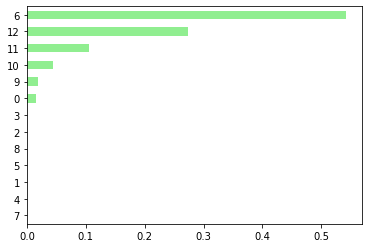

In [8]:
# BAGGING CLASSIFICATION
# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score= True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the traing set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))
# The difference between test and oob accuracy will be minimal which proved that we don't need cross validation to check the model accuracy


# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


# FEATURE IMPORTANCE in sklearn

import pandas as pd
import matplotlib.pyplot as plt
X_train = pd.DataFrame(X_train)
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)

#importances_rf = pd.DataFrame(rf.feature_importances_,
#                                   index = X_train.columns,
#                                    columns=['importance']).sort_values('importance',  
#ascending=False)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind= 'barh', color= 'lightgreen'); 
plt.show()

About bagging. 

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

Given a standard training set $D$ of size n, bagging generates m new training sets  $D_{i}$, each of size n′, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_{i}$. If n′=n, then for large n the set $D_{i}$ is expected to have the fraction (1 - 1/$e$) (≈63.2% ) of the unique examples of $D$, the rest being duplicates. This kind of sample is known as a bootstrap sample. Sampling with replacement ensures each bootstrap is independent from its peers, as it does not depend on previous chosen samples when sampling. Then, m models are fitted using the above m bootstrap samples and combined by averaging the output (for regression) or voting (for classification)

oob (out-of the-bag) accuracy , refers to the accuracy of the ensemble model on data not included in the training bags.  

About random forest.

Random forests is the result of applying the a modified bagging technique utilising decission trees. This type of bagging scheme selects at each candidate split in the learning process, a random subset of the features. This process is sometimes called "feature bagging".

Typically, for a classification problem with $p$ features, $\sqrt p \space$  (rounded down)  features are used in each split. For regression problems the inventors recommend $p/3$ (rounded down) with a minimum node size of 5 as the default. In practice the best values for these parameters will depend on the problem, and they should be treated as tuning parameters.

The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become correlated.

# Part 4 - Boosting

### AdaBoost

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


   alcohol  color_intensity
0    14.23             5.64
1    13.20             4.38
2    13.16             5.68
3    14.37             7.80
4    13.24             4.32

The classes in this data are [0 1 2]
Training set are 124 samples  and Test set are 54 samples

After standardizing our features,data looks like as follows:

    alcohol  color_intensity
0  0.910831        -0.512387
1 -0.956099        -0.982107
2  0.359522         2.220529
3  0.221695        -0.426984
4  1.098777        -0.691735


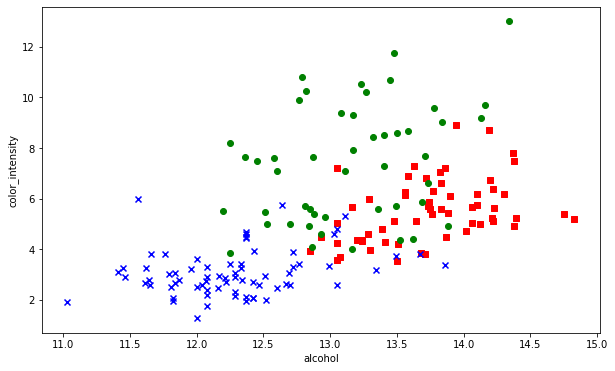

The training accuracy is 66.10%
The test accuracy is 61.27%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


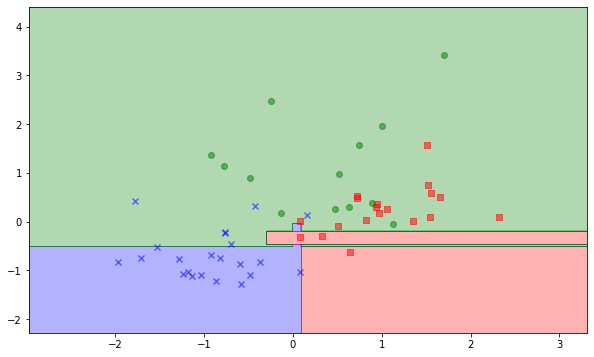

In [29]:

"""
This class uses AdaBoost on wine Dataset and Visiualize the data before and after prediction 
"""
#!/usr/bin/env python3
# Import data and modules

import pylab
import matplotlib.pyplot as plt 
pylab.rcParams['figure.figsize'] = (10, 6)
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

import warnings

def main():
    ## Load the data 
    wine = load_wine()
    X_train, X_test, y_train, y_test, wine_df, X, y = get_data(wine)
    X_train_std,X_test_std = scale_data(X_train,X_test,wine_df)
    show_data(y_test,X,y)
    classification=Adaboost(X_train_std,y_train, X_test_std, y_test)
    classification.perform_adaboost(X_train_std, y_train, X_test_std, y_test)
    
def get_data(wine):
# Only petal length and petal width considered
    X = wine.data[:, [0, 9]]
    y = wine.target
    #print(y)
# Place the data into a pandas dataframe
    wine_df = pd.DataFrame(wine.data[:, [0, 9]], columns = (wine.feature_names[0], wine.feature_names[9]))

# View the data
    print(wine_df.head())

# Print the classes of the dataset
    print('\n' + 'The classes in this data are ' + str(np.unique(y)))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

    print('Training set are {} samples  and Test set are {} samples'.format(
    X_train.shape[0], X_test.shape[0]))
    print()
    return(X_train, X_test, y_train, y_test,wine_df, X,y)
##scale the training data before training
def scale_data(X_train,X_test,wine_df):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    print('After standardizing our features,data looks like as follows:\n')
    print(pd.DataFrame(X_train_std, columns=wine_df.columns).head())
    return(X_train_std,X_test_std)
##visualization of the data before training     
def show_data(y_test,X,y):
    ##There are 3 classes
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   c=cmap(idx), marker=markers[idx], label=cl)
    plt.xlabel('alcohol')
    plt.ylabel('color_intensity')
    plt.show()
##Adaboost Class
class Adaboost(object):
    def __init__(self,X_train_std,y_train,X_test_std, y_test):
        self.X_train_std=X_train_std
        self.y_train=y_train
        self.X_test_std=X_test_std
        self.y_test=y_test
    def perform_adaboost(self,X_train_std,y_train,X_test_std, y_test): ##perform adaboost
     
        ada = AdaBoostClassifier(n_estimators=10)
        ada.fit(X_train_std, y_train)
        train_score=cross_val_score(ada,X_train_std, y_train)
        print('The training accuracy is {:.2f}%'.format(train_score.mean()*100))
        test_score=cross_val_score(ada,X_test_std, y_test)
        print('The test accuracy is {:.2f}%'.format(test_score.mean()*100))
        X=X_test_std
        y=y_test
        resolution=0.01
        #Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'green', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y_test))])
        X=X_test_std
        y=y_test    
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))

        Z = ada.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.5, c=cmap(idx),
                        marker=markers[idx], label=cl)
        plt.show()

if __name__=="__main__":
    main()



About Boosting.

Boosting can be seen as a variation of bagging. However in bagging weak learners are trained in parallel, while in boosting, they learn sequentially. This means that a series of models are constructed and with each new model iteration, the  misclassified data in the previous model are added to the training sample ("bag") semi-randomly in the bagging fashion. This triggers a redistribution of weights that helps the algorithm identify the parameters that it needs to focus on to improve its performance. AdaBoost, which stands for “adaptative boosting algorithm,” is one of the most popular boosting algorithms as it was one of the first of its kind.

In [31]:
#applying Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
classifier=AdaBoostClassifier(n_estimators=30,learning_rate=1)
adaboost=classifier.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)

#calculating the accuracy
print("Accuracy: ",accuracy_score(y_test,y_pred))
# Evaluate test-set roc_auc_score
#roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')


# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.3f}'.format(roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')))

Accuracy:  0.5370370370370371
ROC AUC score: 0.969


In [33]:
# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
# Once the classifier adb_clf is trained, call the .predict_proba() method by passing X_test as a parameter 
# Extract these probabilities by slicing all the values in the second column as follows
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

#adb_clf_roc_auc_score= roc_auc_score(y_test, y_pred_proba,multi_class='ovr' )

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')))

ROC AUC score: 0.97


In [34]:
# Gradient Boosting in sklearn
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))


# Stochastic Gradient Boosting in sklearn
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)
# 0.8 refers to sample 80% of datafor training
# 0.2 refers to each tree uses 20% of the available features to perform best split

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 0.27
Test set RMSE: 0.26


# Part 5 - Model Tuning 

### grid search

grid search is a great tool to test for performance using different hyperparameters. It uses cross validation to provide the results.

In [35]:
# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

# Print out 'dt's hyperparameters
print(dt.get_params())

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
              'max_depth': [3, 4,5, 6],
              'min_samples_leaf': [0.04, 0.06, 0.08],
              'max_features': [0.2, 0.4,0.6, 0.8]
            }

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
#y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred_proba = best_model.predict_proba(X_test)
# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
#roc_auc_score(y_test, y_pred_proba,multi_class='ovr')
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba,multi_class='ovr')))


# Inspecting RF Hyperparameters in sklearn
# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

# Inspect rf' s hyperparameters
rf.get_params()

# Basic imports
# Define a grid of hyperparameter 'params_rf'
params_rf = {
                'n_estimators': [300, 400, 500],
                'max_depth': [4, 6, 8],
                'min_samples_leaf': [0.1, 0.2],
                'max_features': ['log2','sqrt']
            }

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf, cv=3, scoring= 'neg_mean_squared_error',verbose=1, n_jobs=-1)

# Searching for the best hyperparameters
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}
Best hyerparameters:
 {'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 0.06}
Best CV accuracy
Test set accuracy of best model: 0.907
Test set ROC AUC score: 0.929
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.1s finished


Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}
Test set RMSE of rf: 0.26


# Part 6 - Performance Metrics for Classification and Regression

## ROC Curve 
Scikit Learn has an easy way to create ROC curve and calculate the area under the ROC curve. First off, let’s start with a classifier like Logistic Regression and let it predict all the probabilities (thresholds).

About ROC curve.

The ROC graph summarizes all of the confusion matrices that each threshold produced. AUC refers to the area under the curve for which a large value is prefered.

Text(0.3, 0.8, 'ROC Curve')

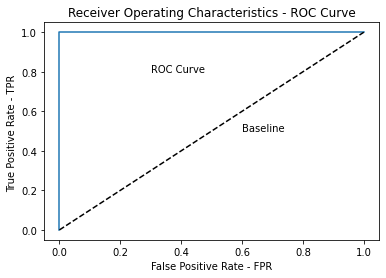

In [40]:
# get the data
# Get only some of the data
wine_data = wine.data[0:100,:]
wine_target = wine.target[0:100]

#test - train split
X_train, X_test, y_train, y_test = train_test_split (wine_data[:,0], wine_target)
 
# Model the data using Logistic Regression
from sklearn import linear_model
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(wine_data[:,0].reshape(-1,1), wine_target)
# Use roc_curve function to create the True Positive Rate and False positive Rate.
from sklearn.metrics import roc_curve, auc
 
probabilities = model.predict_proba(X_test.reshape(-1,1))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot the ROC curve

import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
 
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")

In [41]:
# computes the area under the ROC curve
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9692635254588634

### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
X_test =np.array(X_test).reshape(-1,1)
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[20,  0],
       [ 0,  5]], dtype=int64)

# Part 7 - Naive Bayes Classifier

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt



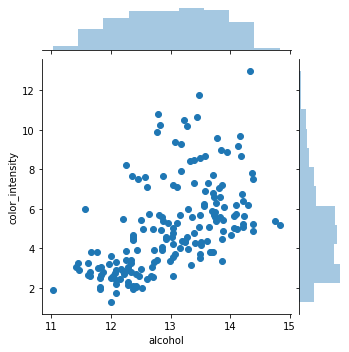

In [48]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="alcohol", y="color_intensity", data=data, size=5)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


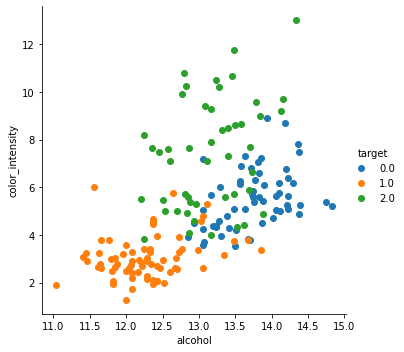

In [49]:
sns.FacetGrid(data, hue="target", size=5) \
   .map(plt.scatter, "alcohol", "color_intensity") \
   .add_legend()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


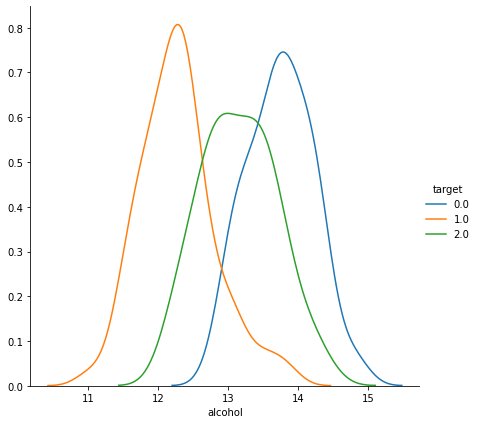

In [51]:
sns.FacetGrid(data, hue="target", size=6) \
   .map(sns.kdeplot, "alcohol") \
   .add_legend()


In [52]:
#Dividing the data for training and testing

#Once we have understood what the dataset is about, we can start training a model based on the algorithms. Here, we will be implementing some of the commonly used algorithms in machine learning. Let us start by training our model with some of the samples. We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 80:20.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       1.00      0.81      0.90        16
         2.0       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36

[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
accuracy is 0.9166666666666666


In [54]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      0.81      0.87        16
         2.0       0.62      0.83      0.71         6

    accuracy                           0.86        36
   macro avg       0.83      0.86      0.84        36
weighted avg       0.88      0.86      0.87        36

[[13  1  0]
 [ 0 13  3]
 [ 1  0  5]]
accuracy is 0.8611111111111112


In [55]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.44      1.00      0.62        16
         2.0       0.00      0.00      0.00         6

    accuracy                           0.44        36
   macro avg       0.15      0.33      0.21        36
weighted avg       0.20      0.44      0.27        36

[[ 0 14  0]
 [ 0 16  0]
 [ 0  6  0]]
accuracy is 0.4444444444444444


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.76      0.81      0.79        16
         2.0       1.00      0.33      0.50         6

    accuracy                           0.78        36
   macro avg       0.84      0.69      0.71        36
weighted avg       0.80      0.78      0.76        36

[[13  1  0]
 [ 3 13  0]
 [ 1  3  2]]
accuracy is 0.7777777777777778


In [57]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

GaussianNB
****Results****
Accuracy: 91.6667%
MultinomialNB
****Results****
Accuracy: 86.1111%
BernoulliNB
****Results****
Accuracy: 44.4444%
ComplementNB
****Results****
Accuracy: 77.7778%
